# **IMPORT LIBRARIES & DATASET**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV, cross_val_score, KFold
from matplotlib import pyplot
from xgboost import plot_importance, plot_tree
from sklearn.preprocessing import LabelEncoder
import warnings
import plotly.express as px
warnings.filterwarnings("ignore")

In [2]:
df_1 = pd.read_csv(r"D:\CHUNG KẾT DA final\Data\train_1.csv")
df_2 = pd.read_csv(r"D:\CHUNG KẾT DA final\Data\train_2.csv")
predict_file = pd.read_csv(r"D:\CHUNG KẾT DA final\Data\predict.csv")
submission_file = pd.read_excel(r"D:\CHUNG KẾT DA final\Data\submission.xlsx")

In [3]:
df_1

,Case_ID,Total_TL,Tot_Closed_TL,Tot_Active_TL,Total_TL_opened_L6M,Tot_TL_closed_L6M,pct_tl_open_L6M,pct_tl_closed_L6M,pct_active_tl,pct_closed_tl,...,CC_TL,Consumer_TL,Gold_TL,Home_TL,PL_TL,Secured_TL,Unsecured_TL,Other_TL,Age_Oldest_TL,Age_Newest_TL
0,1,3,3,0,0,0,0.000,0.0,0.000,1.000,...,0,0,0,0,0,3,0,3,45,14
1,2,1,0,1,0,0,0.000,0.0,1.000,0.000,...,0,0,0,0,0,1,0,1,24,24
2,3,8,6,2,1,0,0.125,0.0,0.250,0.750,...,0,0,7,0,0,8,0,1,78,2
3,4,1,0,1,0,0,0.000,0.0,1.000,0.000,...,0,0,0,0,0,1,0,0,12,12
4,5,1,0,1,0,0,0.000,0.0,1.000,0.000,...,0,1,0,0,0,0,1,0,7,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39523,39524,2,1,1,1,1,0.500,0.5,0.500,0.500,...,0,0,0,0,2,0,2,0,38,5
39524,39525,15,12,3,2,3,0.133,0.2,0.200,0.800,...,0,0,13,1,0,15,0,0,47,1
39525,39526,1,1,0,0,0,0.000,0.0,0.000,1.000,...,0,0,1,0,0,1,0,0,36,36
39526,39527,8,5,3,0,0,0.000,0.0,0.375,0.625,...,0,0,1,1,0,8,0,6,72,10


In [4]:
df_2

,Case_ID,time_since_recent_payment,time_since_first_deliquency,time_since_recent_deliquency,num_times_delinquent,max_delinquency_level,max_recent_level_of_deliq,num_deliq_6mts,num_deliq_12mts,num_deliq_6_12mts,...,pct_PL_enq_L6m_of_L12m,pct_CC_enq_L6m_of_L12m,pct_PL_enq_L6m_of_ever,pct_CC_enq_L6m_of_ever,max_unsec_exposure_inPct,HL_Flag,GL_Flag,last_prod_enq2,first_prod_enq2,Approved_Flag
0,1,288,-99999,-99999,0,-99999,0,0,0,0,...,0.0,0.0,0.000,0.0,-99999.000,0,0,ConsumerLoan,ConsumerLoan,P2
1,2,651,-99999,-99999,0,-99999,0,0,0,0,...,0.0,0.0,0.000,0.0,-99999.000,0,0,others,others,P2
2,3,349,-99999,-99999,0,-99999,0,0,0,0,...,0.0,0.0,0.000,0.0,-99999.000,1,0,CC,others,P2
3,4,48,-99999,-99999,0,-99999,0,0,0,0,...,0.0,0.0,0.000,0.0,-99999.000,0,0,others,others,P2
4,5,77,-99999,-99999,0,-99999,0,0,0,0,...,0.0,0.0,0.000,0.0,0.833,0,0,PL,PL,P2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39523,39524,149,-99999,-99999,0,-99999,0,0,0,0,...,1.0,1.0,0.667,1.0,22.222,0,0,CC,PL,P2
39524,39525,37,8,8,1,22,22,0,1,1,...,0.0,0.0,0.000,0.0,-99999.000,1,1,ConsumerLoan,ConsumerLoan,P2
39525,39526,828,32,29,4,121,29,0,0,0,...,0.0,0.0,0.000,0.0,-99999.000,1,0,ConsumerLoan,ConsumerLoan,P4
39526,39527,40,35,2,24,35,3,4,8,4,...,0.0,0.0,0.000,0.0,-99999.000,1,1,ConsumerLoan,HL,P2


In [5]:
predict_file

,Case_ID,Total_TL,Tot_Closed_TL,Tot_Active_TL,Total_TL_opened_L6M,Tot_TL_closed_L6M,pct_tl_open_L6M,pct_tl_closed_L6M,pct_active_tl,pct_closed_tl,...,pct_PL_enq_L6m_of_L12m,pct_CC_enq_L6m_of_L12m,pct_PL_enq_L6m_of_ever,pct_CC_enq_L6m_of_ever,max_unsec_exposure_inPct,HL_Flag,GL_Flag,last_prod_enq2,first_prod_enq2,Approved_Flag
0,990000,7.0,1.0,6.0,4.0,0.0,0.571,0.000,0.857,0.143,...,1.000,0.00,1.000,0.0,2.504,0.0,0.0,PL,ConsumerLoan,NaN
1,990001,2.0,0.0,2.0,0.0,0.0,0.000,0.000,1.000,0.000,...,0.000,0.00,0.000,0.0,5.223,0.0,0.0,PL,others,NaN
2,990002,1.0,0.0,1.0,0.0,0.0,0.000,0.000,1.000,0.000,...,0.000,0.00,0.000,0.0,0.364,0.0,0.0,ConsumerLoan,others,NaN
3,990003,2.0,0.0,2.0,0.0,0.0,0.000,0.000,1.000,0.000,...,0.000,1.00,0.000,1.0,6.821,0.0,0.0,CC,others,NaN
4,990004,3.0,0.0,3.0,1.0,0.0,0.333,0.000,1.000,0.000,...,0.333,0.00,0.333,0.0,50.391,0.0,0.0,ConsumerLoan,HL,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,990995,9.0,5.0,4.0,0.0,3.0,0.000,0.333,0.444,0.556,...,0.000,0.00,0.000,0.0,2.645,0.0,0.0,PL,CC,NaN
996,990996,2.0,1.0,1.0,1.0,0.0,0.500,0.000,0.500,0.500,...,0.000,0.00,0.000,0.0,0.600,0.0,0.0,ConsumerLoan,ConsumerLoan,NaN
997,990997,4.0,0.0,4.0,3.0,0.0,0.750,0.000,1.000,0.000,...,1.000,0.75,1.000,0.6,2.667,0.0,0.0,CC,CC,NaN
998,990998,6.0,2.0,4.0,0.0,1.0,0.000,0.167,0.667,0.333,...,1.000,0.00,0.500,0.0,4.052,0.0,0.0,AL,AL,NaN


In [6]:
submission_file

,Case_ID,Approved_Flag
0,990000,NaN
1,990001,NaN
2,990002,NaN
3,990003,NaN
4,990004,NaN
...,...,...
995,990995,NaN
996,990996,NaN
997,990997,NaN
998,990998,NaN


In [7]:
data = df_1.merge(df_2, on="Case_ID", how="inner")

In [8]:
data

,Case_ID,Total_TL,Tot_Closed_TL,Tot_Active_TL,Total_TL_opened_L6M,Tot_TL_closed_L6M,pct_tl_open_L6M,pct_tl_closed_L6M,pct_active_tl,pct_closed_tl,...,pct_PL_enq_L6m_of_L12m,pct_CC_enq_L6m_of_L12m,pct_PL_enq_L6m_of_ever,pct_CC_enq_L6m_of_ever,max_unsec_exposure_inPct,HL_Flag,GL_Flag,last_prod_enq2,first_prod_enq2,Approved_Flag
0,1,3,3,0,0,0,0.000,0.0,0.000,1.000,...,0.0,0.0,0.000,0.0,-99999.000,0,0,ConsumerLoan,ConsumerLoan,P2
1,2,1,0,1,0,0,0.000,0.0,1.000,0.000,...,0.0,0.0,0.000,0.0,-99999.000,0,0,others,others,P2
2,3,8,6,2,1,0,0.125,0.0,0.250,0.750,...,0.0,0.0,0.000,0.0,-99999.000,1,0,CC,others,P2
3,4,1,0,1,0,0,0.000,0.0,1.000,0.000,...,0.0,0.0,0.000,0.0,-99999.000,0,0,others,others,P2
4,5,1,0,1,0,0,0.000,0.0,1.000,0.000,...,0.0,0.0,0.000,0.0,0.833,0,0,PL,PL,P2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39523,39524,2,1,1,1,1,0.500,0.5,0.500,0.500,...,1.0,1.0,0.667,1.0,22.222,0,0,CC,PL,P2
39524,39525,15,12,3,2,3,0.133,0.2,0.200,0.800,...,0.0,0.0,0.000,0.0,-99999.000,1,1,ConsumerLoan,ConsumerLoan,P2
39525,39526,1,1,0,0,0,0.000,0.0,0.000,1.000,...,0.0,0.0,0.000,0.0,-99999.000,1,0,ConsumerLoan,ConsumerLoan,P4
39526,39527,8,5,3,0,0,0.000,0.0,0.375,0.625,...,0.0,0.0,0.000,0.0,-99999.000,1,1,ConsumerLoan,HL,P2


In [9]:
data = data.drop(columns="Case_ID")
predict_file = predict_file.drop(columns="Case_ID")

# **EXPLORE DATA ANALYSIS (EDA)**

## **0. Describe data**

In [10]:
data.describe()

,Total_TL,Tot_Closed_TL,Tot_Active_TL,Total_TL_opened_L6M,Tot_TL_closed_L6M,pct_tl_open_L6M,pct_tl_closed_L6M,pct_active_tl,pct_closed_tl,Total_TL_opened_L12M,...,CC_Flag,PL_utilization,PL_Flag,pct_PL_enq_L6m_of_L12m,pct_CC_enq_L6m_of_L12m,pct_PL_enq_L6m_of_ever,pct_CC_enq_L6m_of_ever,max_unsec_exposure_inPct,HL_Flag,GL_Flag
count,39528.000000,39528.000000,39528.000000,39528.000000,39528.000000,39528.000000,39528.000000,39528.000000,39528.000000,39528.000000,...,39528.000000,39528.000000,39528.000000,39528.000000,39528.000000,39528.000000,39528.000000,39528.000000,39528.000000,39528.000000
mean,4.868751,2.777373,2.091378,0.736339,0.431011,0.183885,0.089628,0.577424,0.422576,1.504933,...,0.089658,-86616.114702,0.167603,0.190755,0.065451,0.170809,0.056505,-45105.168735,0.270745,0.053861
std,7.220031,5.987964,2.288112,1.296507,0.996742,0.296372,0.206031,0.379639,0.379639,2.118334,...,0.285695,34047.216087,0.373518,0.376358,0.236238,0.350358,0.213850,49783.963367,0.444350,0.225745
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,-99999.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-99999.000000,0.000000,0.000000
25%,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.250000,0.000000,0.000000,...,0.000000,-99999.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-99999.000000,0.000000,0.000000
50%,2.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.556000,0.444000,1.000000,...,0.000000,-99999.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.335000,0.000000,0.000000
75%,5.000000,3.000000,3.000000,1.000000,1.000000,0.304000,0.059000,1.000000,0.750000,2.000000,...,0.000000,-99999.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.159250,1.000000,0.000000
max,235.000000,216.000000,47.000000,27.000000,19.000000,1.000000,1.000000,1.000000,1.000000,39.000000,...,1.000000,1.708000,1.000000,1.000000,1.000000,1.000000,1.000000,83672.100000,1.000000,1.000000


## **1. Checking type of data**

In [11]:
data.dtypes

Total_TL                int64
Tot_Closed_TL           int64
Tot_Active_TL           int64
Total_TL_opened_L6M     int64
Tot_TL_closed_L6M       int64
                        ...  
HL_Flag                 int64
GL_Flag                 int64
last_prod_enq2         object
first_prod_enq2        object
Approved_Flag          object
Length: 85, dtype: object

In [12]:
data.dtypes.value_counts()

int64      63
float64    16
object      6
Name: count, dtype: int64

## **2. Checking duplicates**

In [13]:
data[data.duplicated()]

,Total_TL,Tot_Closed_TL,Tot_Active_TL,Total_TL_opened_L6M,Tot_TL_closed_L6M,pct_tl_open_L6M,pct_tl_closed_L6M,pct_active_tl,pct_closed_tl,Total_TL_opened_L12M,...,pct_PL_enq_L6m_of_L12m,pct_CC_enq_L6m_of_L12m,pct_PL_enq_L6m_of_ever,pct_CC_enq_L6m_of_ever,max_unsec_exposure_inPct,HL_Flag,GL_Flag,last_prod_enq2,first_prod_enq2,Approved_Flag
38096,6,3,3,1,1,0.167,0.167,0.5,0.5,3,...,0.0,0.0,0.0,0.0,0.512,1,0,others,others,P2


## **3. Correlation**

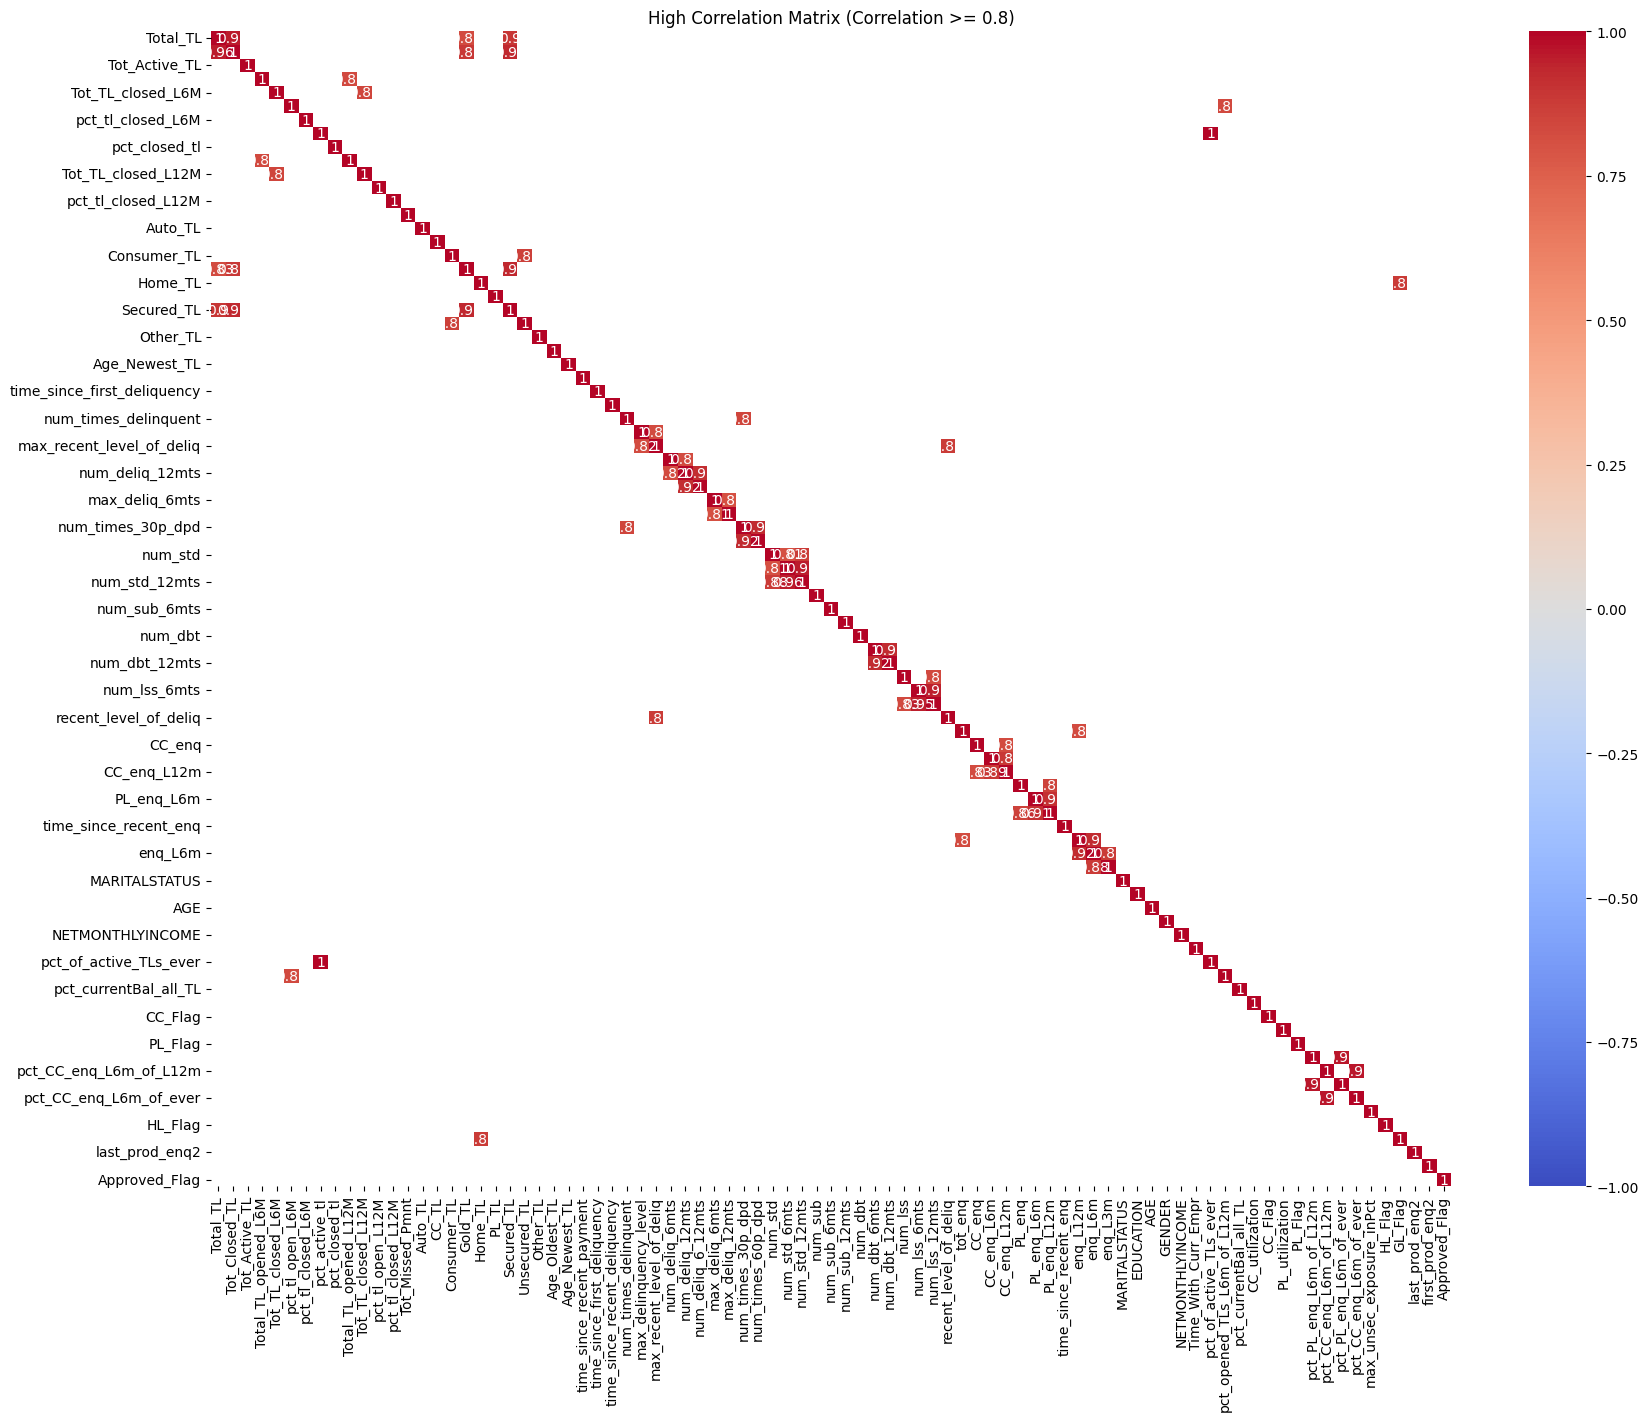

In [14]:
data_corr = data.copy()
numeric_cols = data_corr.select_dtypes(include=[np.number]).columns
categorical_cols = data_corr.select_dtypes(include=['object']).columns

for i in categorical_cols:
  lb = LabelEncoder()
  data_corr[i] = lb.fit_transform(data_corr[i])

data_corr[numeric_cols] = data_corr[numeric_cols].apply(lambda col: col.apply(lambda x: np.nan if x < -9000 else x))

# Tính ma trận tương quan tuyến tính
correlation_matrix_subset = data_corr.corr()

# Hiển thị những giá trị lớn hơn 0.8
high_correlation = correlation_matrix_subset[correlation_matrix_subset >= 0.8]

# Vẽ mô hình
plt.figure(figsize=(20, 15))
sn.heatmap(high_correlation, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('High Correlation Matrix (Correlation >= 0.8)')
plt.show()

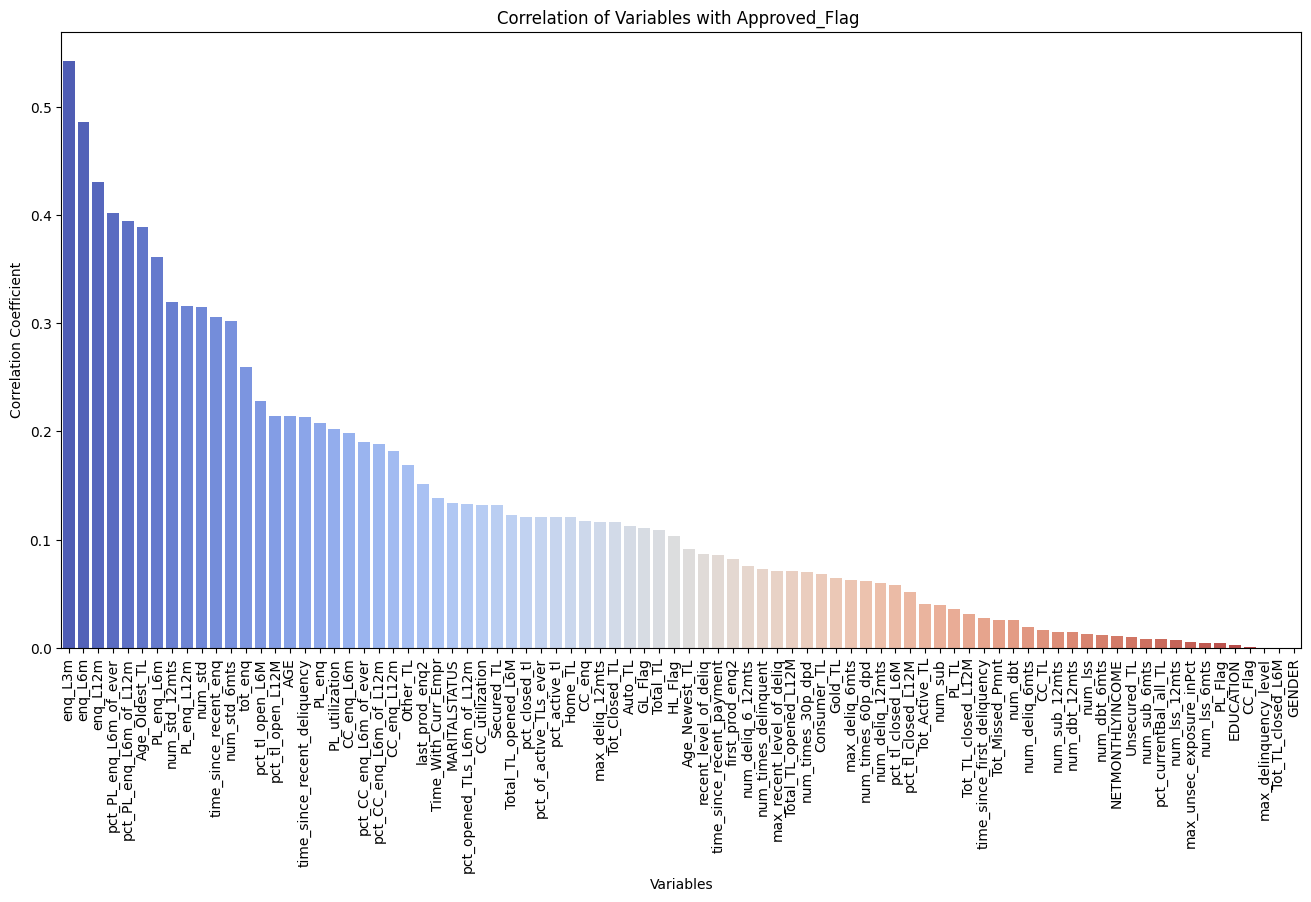

In [15]:
# Tính ma trận tương quan
correlation_matrix = data_corr.corr()

# Lấy chỉ số tương quan của tất cả các biến với biến 'Approved_Flag'
correlation_with_approved_flag = abs(correlation_matrix['Approved_Flag'].drop('Approved_Flag'))

# Lọc các biến có tương quan nhỏ hơn 0.01
# low_correlation = abs(correlation_with_approved_flag[correlation_with_approved_flag < 0.01])

# Sắp xếp các biến theo giá trị tương quan tăng dần
correlation_with_approved_flag = correlation_with_approved_flag.sort_values(ascending=False)

# Điều chỉnh kích thước của biểu đồ
plt.figure(figsize=(16, 8))

sn.barplot(y=correlation_with_approved_flag.values, x=correlation_with_approved_flag.index, palette='coolwarm')
plt.xticks(rotation=90)
plt.title('Correlation of Variables with Approved_Flag ')
plt.ylabel('Correlation Coefficient')
plt.xlabel('Variables')
plt.show()

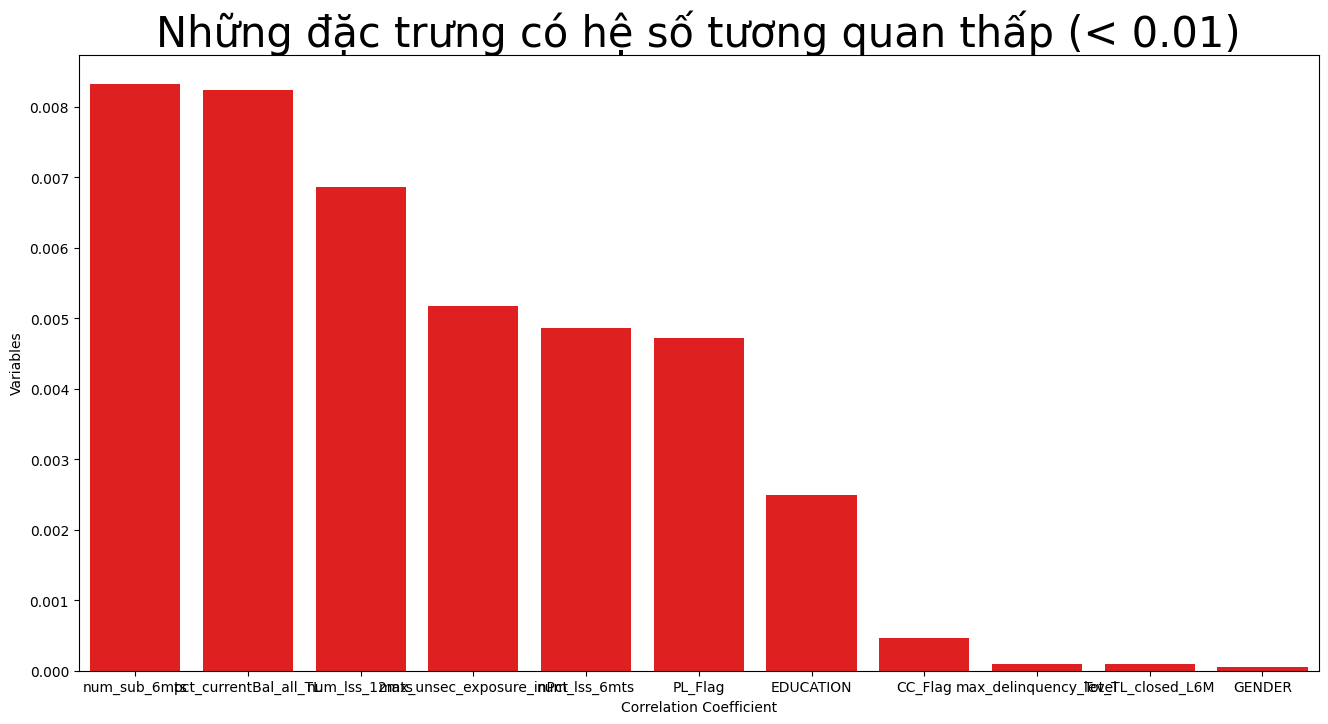

In [16]:
# Tính ma trận tương quan
correlation_matrix = data_corr.corr()

# Lấy chỉ số tương quan của tất cả các biến với biến 'Approved_Flag'
correlation_with_approved_flag = abs(correlation_matrix['Approved_Flag'].drop('Approved_Flag'))

# Lọc các biến có tương quan nhỏ hơn 0.01
low_correlation = correlation_with_approved_flag[correlation_with_approved_flag < 0.01]

# Sắp xếp các biến theo giá trị tương quan tăng dần
low_correlation = low_correlation.sort_values(ascending=False)

# Điều chỉnh kích thước của biểu đồ
plt.figure(figsize=(16, 8))
sn.barplot(y=low_correlation.values, x=low_correlation.index, color='red')
plt.title('Những đặc trưng có hệ số tương quan thấp (< 0.01)', size=30)
plt.xlabel('Correlation Coefficient')
plt.ylabel('Variables')
plt.show()

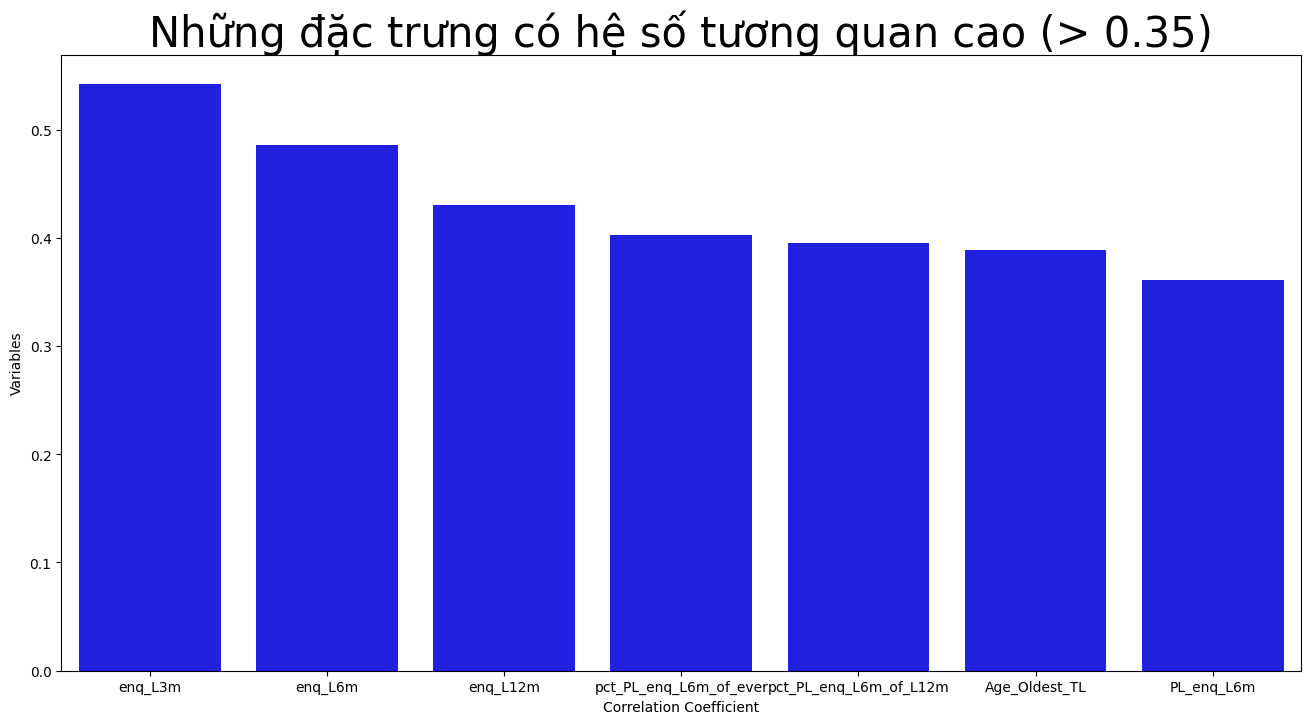

In [17]:
# Lọc các biến có tương quan nhỏ hơn 0.01
high_correlation = abs(correlation_with_approved_flag[correlation_with_approved_flag > 0.35])

# Sắp xếp các biến theo giá trị tương quan tăng dần
high_correlation = high_correlation.sort_values(ascending=False)

# Điều chỉnh kích thước của biểu đồ
plt.figure(figsize=(16, 8))
sn.barplot(y=high_correlation.values, x=high_correlation.index, color='blue')
plt.title('Những đặc trưng có hệ số tương quan cao (> 0.35)', size=30)
plt.xlabel('Correlation Coefficient')
plt.ylabel('Variables')
plt.show()

## **4. Distribution Distribution**

<BarContainer object of 4 artists>

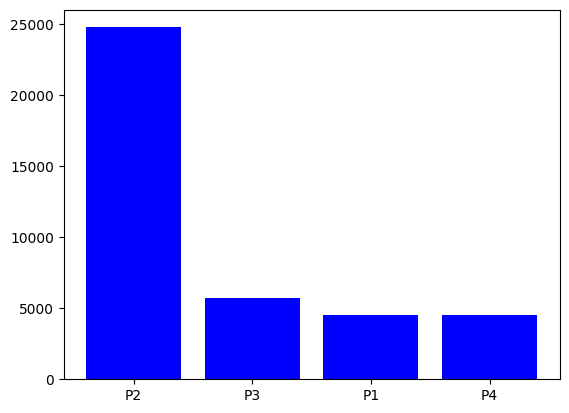

In [18]:
value_count_approved_flag = data["Approved_Flag"].value_counts()
plt.bar(value_count_approved_flag.index, value_count_approved_flag.values, color='blue')

# **DATA PREPROCESSING**

## **1. Split dataset**

In [19]:
X = data.iloc[:,:-1]
y = data.iloc[:,-1]

## **2. Numeric and categorical columns**

In [20]:
numeric_cols = X.select_dtypes(include=[np.number]).columns

In [21]:
numeric_cols

Index(['Total_TL', 'Tot_Closed_TL', 'Tot_Active_TL', 'Total_TL_opened_L6M',
       'Tot_TL_closed_L6M', 'pct_tl_open_L6M', 'pct_tl_closed_L6M',
       'pct_active_tl', 'pct_closed_tl', 'Total_TL_opened_L12M',
       'Tot_TL_closed_L12M', 'pct_tl_open_L12M', 'pct_tl_closed_L12M',
       'Tot_Missed_Pmnt', 'Auto_TL', 'CC_TL', 'Consumer_TL', 'Gold_TL',
       'Home_TL', 'PL_TL', 'Secured_TL', 'Unsecured_TL', 'Other_TL',
       'Age_Oldest_TL', 'Age_Newest_TL', 'time_since_recent_payment',
       'time_since_first_deliquency', 'time_since_recent_deliquency',
       'num_times_delinquent', 'max_delinquency_level',
       'max_recent_level_of_deliq', 'num_deliq_6mts', 'num_deliq_12mts',
       'num_deliq_6_12mts', 'max_deliq_6mts', 'max_deliq_12mts',
       'num_times_30p_dpd', 'num_times_60p_dpd', 'num_std', 'num_std_6mts',
       'num_std_12mts', 'num_sub', 'num_sub_6mts', 'num_sub_12mts', 'num_dbt',
       'num_dbt_6mts', 'num_dbt_12mts', 'num_lss', 'num_lss_6mts',
       'num_lss_12mts',

In [22]:
categorical_cols = X.select_dtypes(include=['object']).columns

In [23]:
categorical_cols

Index(['MARITALSTATUS', 'EDUCATION', 'GENDER', 'last_prod_enq2',
       'first_prod_enq2'],
      dtype='object')

## **3. Convert missing to null values**

In [24]:
X[numeric_cols] = X[numeric_cols].apply(lambda col: col.apply(lambda x: np.nan if x < -9000 else x))
predict_file[numeric_cols] = predict_file[numeric_cols].apply(lambda col: col.apply(lambda x: np.nan if x < -9000 else x))

In [25]:
X

,Total_TL,Tot_Closed_TL,Tot_Active_TL,Total_TL_opened_L6M,Tot_TL_closed_L6M,pct_tl_open_L6M,pct_tl_closed_L6M,pct_active_tl,pct_closed_tl,Total_TL_opened_L12M,...,PL_Flag,pct_PL_enq_L6m_of_L12m,pct_CC_enq_L6m_of_L12m,pct_PL_enq_L6m_of_ever,pct_CC_enq_L6m_of_ever,max_unsec_exposure_inPct,HL_Flag,GL_Flag,last_prod_enq2,first_prod_enq2
0,3,3,0,0,0,0.000,0.0,0.000,1.000,0,...,0,0.0,0.0,0.000,0.0,NaN,0,0,ConsumerLoan,ConsumerLoan
1,1,0,1,0,0,0.000,0.0,1.000,0.000,0,...,0,0.0,0.0,0.000,0.0,NaN,0,0,others,others
2,8,6,2,1,0,0.125,0.0,0.250,0.750,1,...,0,0.0,0.0,0.000,0.0,NaN,1,0,CC,others
3,1,0,1,0,0,0.000,0.0,1.000,0.000,1,...,0,0.0,0.0,0.000,0.0,NaN,0,0,others,others
4,1,0,1,0,0,0.000,0.0,1.000,0.000,1,...,0,0.0,0.0,0.000,0.0,0.833,0,0,PL,PL
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39523,2,1,1,1,1,0.500,0.5,0.500,0.500,1,...,1,1.0,1.0,0.667,1.0,22.222,0,0,CC,PL
39524,15,12,3,2,3,0.133,0.2,0.200,0.800,5,...,0,0.0,0.0,0.000,0.0,NaN,1,1,ConsumerLoan,ConsumerLoan
39525,1,1,0,0,0,0.000,0.0,0.000,1.000,0,...,0,0.0,0.0,0.000,0.0,NaN,1,0,ConsumerLoan,ConsumerLoan
39526,8,5,3,0,0,0.000,0.0,0.375,0.625,2,...,0,0.0,0.0,0.000,0.0,NaN,1,1,ConsumerLoan,HL


## **4. Handling missing values**

Define columns to drop and columns to fill

In [26]:
nan_counts = X[numeric_cols].isnull().sum()

In [27]:
nan_counts_drop = nan_counts[nan_counts > 10000]

In [28]:
nan_counts_fill = nan_counts[(nan_counts < 10000) & (nan_counts > 1)]

In [29]:
nan_counts_drop

time_since_first_deliquency     27642
time_since_recent_deliquency    27642
max_delinquency_level           27642
CC_utilization                  36675
PL_utilization                  34238
max_unsec_exposure_inPct        17836
dtype: int64

In [30]:
nan_counts_fill

Age_Oldest_TL                  34
Age_Newest_TL                  34
time_since_recent_payment    3280
max_deliq_6mts               9914
max_deliq_12mts              8349
tot_enq                      4835
CC_enq                       4835
CC_enq_L6m                   4835
CC_enq_L12m                  4835
PL_enq                       4835
PL_enq_L6m                   4835
PL_enq_L12m                  4835
time_since_recent_enq        4835
enq_L12m                     4835
enq_L6m                      4835
enq_L3m                      4835
pct_currentBal_all_TL          55
dtype: int64

Drop columns with large missing values

In [31]:
columns_to_drop = nan_counts_drop.index

In [32]:
X = X.drop(columns=columns_to_drop)
predict_file = predict_file.drop(columns=columns_to_drop)

Fill missing values

In [33]:
for col in nan_counts_fill.index:
    mean_value = X[col].mean()
    X[col].fillna(mean_value, inplace=True)

In [34]:
print(X.isnull().sum().sum())
print(predict_file.isnull().sum().sum())

0
1000


## **5. Feature Engineering**

Encoding categorical in X

In [35]:
from sklearn.preprocessing import LabelEncoder

for column in categorical_cols:
    le = LabelEncoder()
    X[column] = le.fit_transform(X[column])
    predict_file[column] = le.fit_transform(predict_file[column])

In [36]:
X

,Total_TL,Tot_Closed_TL,Tot_Active_TL,Total_TL_opened_L6M,Tot_TL_closed_L6M,pct_tl_open_L6M,pct_tl_closed_L6M,pct_active_tl,pct_closed_tl,Total_TL_opened_L12M,...,CC_Flag,PL_Flag,pct_PL_enq_L6m_of_L12m,pct_CC_enq_L6m_of_L12m,pct_PL_enq_L6m_of_ever,pct_CC_enq_L6m_of_ever,HL_Flag,GL_Flag,last_prod_enq2,first_prod_enq2
0,3,3,0,0,0,0.000,0.0,0.000,1.000,0,...,0,0,0.0,0.0,0.000,0.0,0,0,2,2
1,1,0,1,0,0,0.000,0.0,1.000,0.000,0,...,0,0,0.0,0.0,0.000,0.0,0,0,5,5
2,8,6,2,1,0,0.125,0.0,0.250,0.750,1,...,0,0,0.0,0.0,0.000,0.0,1,0,1,5
3,1,0,1,0,0,0.000,0.0,1.000,0.000,1,...,0,0,0.0,0.0,0.000,0.0,0,0,5,5
4,1,0,1,0,0,0.000,0.0,1.000,0.000,1,...,0,0,0.0,0.0,0.000,0.0,0,0,4,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39523,2,1,1,1,1,0.500,0.5,0.500,0.500,1,...,0,1,1.0,1.0,0.667,1.0,0,0,1,4
39524,15,12,3,2,3,0.133,0.2,0.200,0.800,5,...,0,0,0.0,0.0,0.000,0.0,1,1,2,2
39525,1,1,0,0,0,0.000,0.0,0.000,1.000,0,...,0,0,0.0,0.0,0.000,0.0,1,0,2,2
39526,8,5,3,0,0,0.000,0.0,0.375,0.625,2,...,0,0,0.0,0.0,0.000,0.0,1,1,2,3


Encoding categorical in y

In [37]:
classification_dict_1 = {
    "P1" : 0,
    "P2" : 1,
    "P3" : 2,
    "P4" : 3
}

classification_dict_2 = {
    0 : "P1",
    1 : "P2",
    2 : "P3",
    3 : "P4"
}

In [38]:
y = y.apply(lambda x: classification_dict_1[x])

In [39]:
y

0        1
1        1
2        1
3        1
4        1
        ..
39523    1
39524    1
39525    3
39526    1
39527    1
Name: Approved_Flag, Length: 39528, dtype: int64

## **6. Upsampling**

In [40]:
from imblearn.over_sampling import SMOTE

sm = SMOTE(k_neighbors=5)
X, y = sm.fit_resample(X ,y)

In [41]:
X

,Total_TL,Tot_Closed_TL,Tot_Active_TL,Total_TL_opened_L6M,Tot_TL_closed_L6M,pct_tl_open_L6M,pct_tl_closed_L6M,pct_active_tl,pct_closed_tl,Total_TL_opened_L12M,...,CC_Flag,PL_Flag,pct_PL_enq_L6m_of_L12m,pct_CC_enq_L6m_of_L12m,pct_PL_enq_L6m_of_ever,pct_CC_enq_L6m_of_ever,HL_Flag,GL_Flag,last_prod_enq2,first_prod_enq2
0,3,3,0,0,0,0.000000,0.000000,0.000000,1.000000,0,...,0,0,0.000000,0.000000,0.000000,0.000000,0,0,2,2
1,1,0,1,0,0,0.000000,0.000000,1.000000,0.000000,0,...,0,0,0.000000,0.000000,0.000000,0.000000,0,0,5,5
2,8,6,2,1,0,0.125000,0.000000,0.250000,0.750000,1,...,0,0,0.000000,0.000000,0.000000,0.000000,1,0,1,5
3,1,0,1,0,0,0.000000,0.000000,1.000000,0.000000,1,...,0,0,0.000000,0.000000,0.000000,0.000000,0,0,5,5
4,1,0,1,0,0,0.000000,0.000000,1.000000,0.000000,1,...,0,0,0.000000,0.000000,0.000000,0.000000,0,0,4,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99191,1,0,1,1,0,1.000000,0.000000,1.000000,0.000000,1,...,0,0,0.031762,0.000000,0.031762,0.000000,0,0,2,2
99192,10,7,3,1,0,0.151888,0.000000,0.331655,0.668345,2,...,0,1,0.756577,0.851130,0.756577,0.851130,0,0,3,3
99193,1,0,1,0,0,0.469518,0.000000,0.530482,0.469518,0,...,0,0,0.060964,0.939036,0.060964,0.939036,0,0,2,2
99194,1,0,0,0,0,0.000000,0.557248,0.442752,0.557248,0,...,0,0,0.442752,0.000000,0.442752,0.000000,0,0,4,3


In [42]:
y

0        1
1        1
2        1
3        1
4        1
        ..
99191    3
99192    3
99193    3
99194    3
99195    3
Name: Approved_Flag, Length: 99196, dtype: int64

# **TESTING**

Load model

In [44]:
import pickle
with open(r"D:\CHUNG KẾT DA final\save model\best_model_final.pkl", 'rb') as file:
    model = pickle.load(file)

Predict submission.xlsx

In [48]:
predict_file = predict_file.drop(columns=["Approved_Flag"], axis=1)

In [49]:
submission_file["Approved_Flag"] = model.predict(predict_file.values)

In [50]:
submission_file

,Case_ID,Approved_Flag
0,990000,2
1,990001,2
2,990002,1
3,990003,1
4,990004,1
...,...,...
995,990995,1
996,990996,1
997,990997,2
998,990998,3


In [51]:
submission_file["Approved_Flag"] = submission_file["Approved_Flag"].apply(lambda x: classification_dict_2[x])

In [52]:
submission_file

,Case_ID,Approved_Flag
0,990000,P3
1,990001,P3
2,990002,P2
3,990003,P2
4,990004,P2
...,...,...
995,990995,P2
996,990996,P2
997,990997,P3
998,990998,P4


Save submission.xlsx

In [53]:
# submission_file.to_excel(r"D:\CHUNG KẾT DA final\Solution\solution_test_final.xlsx")

Test accuracy

In [54]:
# true label
check = pd.read_excel(r"D:\CHUNG KẾT DA final\Solution\solution_final.xlsx")

In [55]:
import os
import numpy as np
import pandas as pd
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, LabelBinarizer
from pathlib import Path

Y_TRUE = check["Approved_Flag"].tolist()
Y_PRED = submission_file["Approved_Flag"].tolist()

label_binarizer = LabelBinarizer()
label_binarizer.fit(Y_TRUE)
y_true_onehot = label_binarizer.transform(Y_TRUE)
y_pred_onehot = label_binarizer.transform(Y_PRED)

auc_score = roc_auc_score(y_true_onehot, y_pred_onehot, average='micro', multi_class="ovr")
accuracy = accuracy_score(Y_TRUE, Y_PRED)
f1score = f1_score(Y_TRUE, Y_PRED, average='micro')

print('Accuracy: %.3f' % accuracy)
print('F1-Score: %.3f' % f1score)
print('AUC: %.3f' % auc_score)

Accuracy: 1.000
F1-Score: 1.000
AUC: 1.000
